# Author : Amit Kumar Poddar

## The Spark Foundation - GRIP

## Task 6 : Prediction using Decision Tree Algorithm

### Created the decision tree classifier for the classification of flowers from the Iris dataset. So that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline 

##  Importing dataset

In [106]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
data.shape

(150, 6)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [109]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [110]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Training the data

In [111]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=data.loc[:,features].values

In [49]:
y=data.Species

In [77]:

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=1)

In [93]:
model=DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [94]:
model.predict(x_test[0:1])

array(['Iris-setosa'], dtype=object)

In [95]:
from sklearn import metrics
score=model.score(x_test,y_test)

## Accuracy

In [96]:
print(score)

0.9736842105263158


In [97]:
print(metrics.classification_report(y_test,model.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [98]:
cm=metrics.confusion_matrix(y_test, model.predict(x_test))

## Confusion matrix

In [99]:
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Visualization of the data

In [100]:
max_depth_range=list(range(1,6))
accuracy=[]
for depth in max_depth_range:
    model=DecisionTreeClassifier(max_depth=depth,random_state=0)
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    accuracy.append(score)

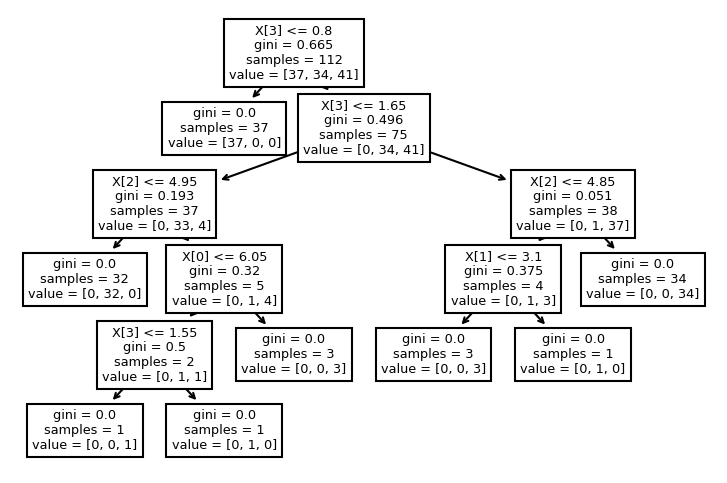

In [101]:
fig, axes = py.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)
tree.plot_tree(model);

In [102]:
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginica']

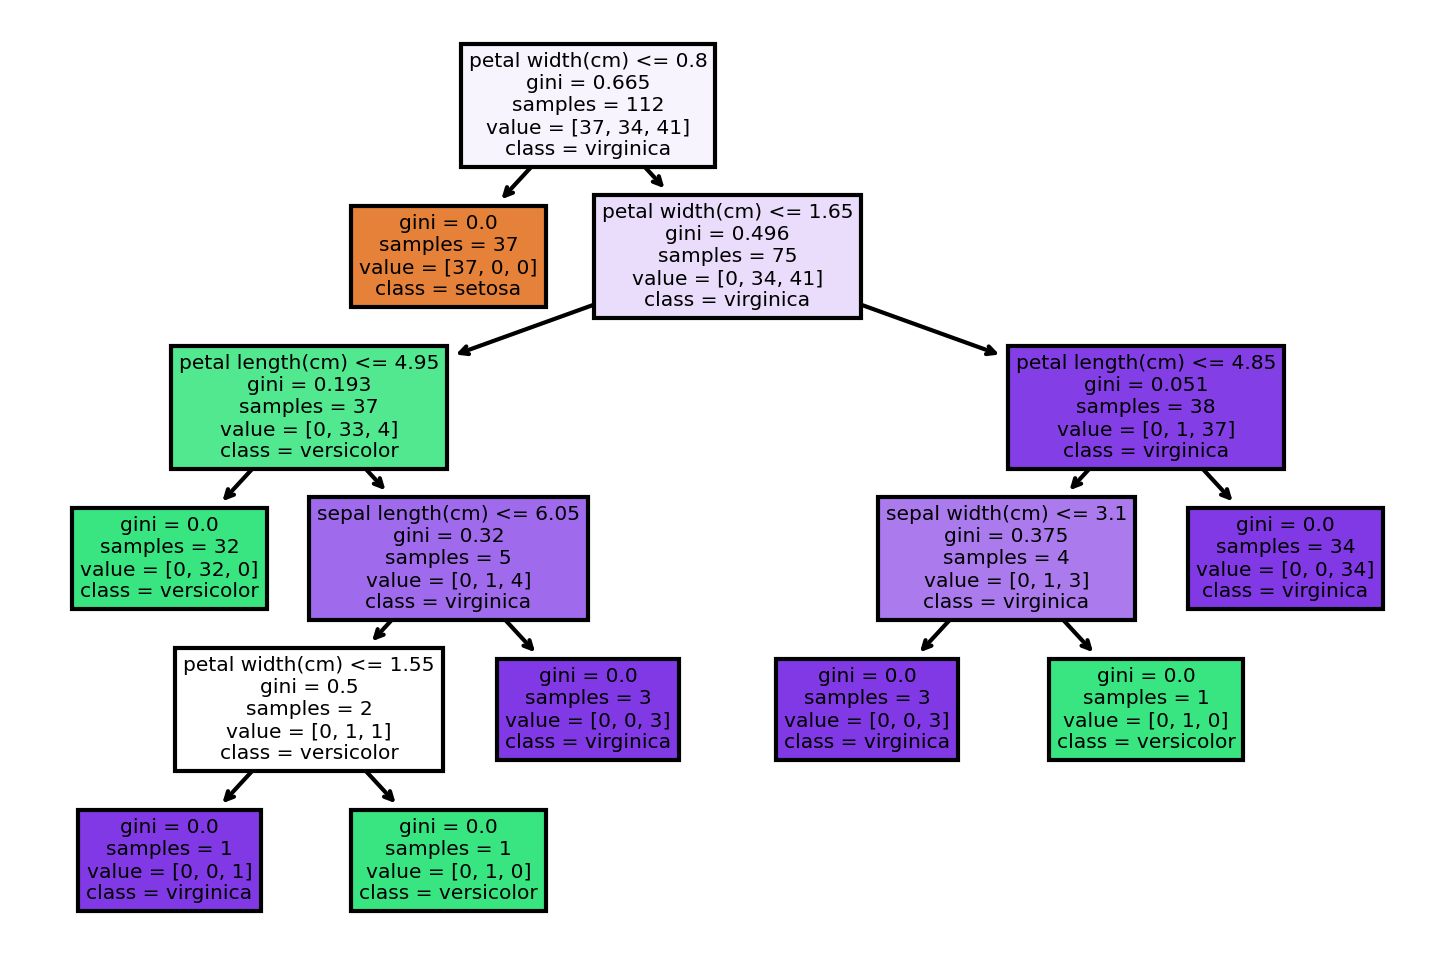

In [103]:
fig,axes=py.subplots(nrows=1,ncols=1,figsize=(6,4),dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

## Conclusion

### After importing and fitting our dataset in our model, accuracy = 97.37%

### Now we can feed any new/test data to this classifer and it would be able to predict the right class accordingly with accuracy of 97.37%.

# Thank You